In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes1.csv", names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


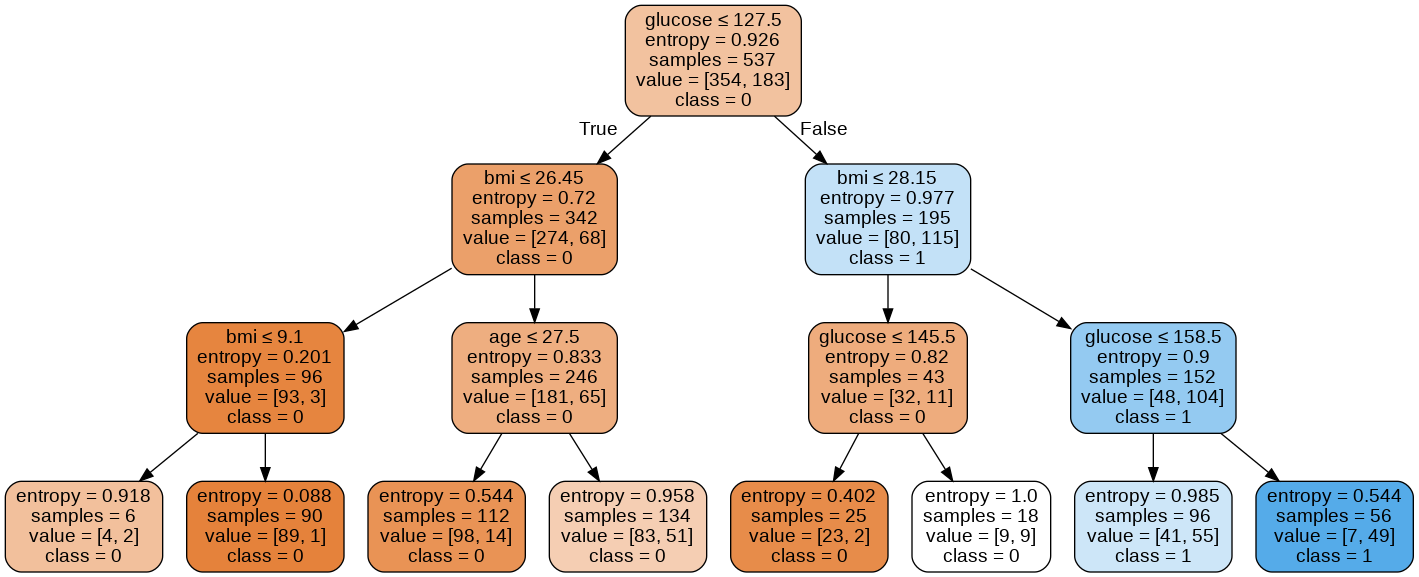

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
loan_data = pd.read_csv("loan_data.csv")
loan_data.info()
loan_data.describe()
loan_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6070,1,all_other,0.1287,50.45,11.002100,8.52,677,8820.041667,1506,37.6,0,2,0,0
4502,1,debt_consolidation,0.1635,559.97,10.933107,22.84,662,8585.958333,14958,71.6,0,0,0,1
393,1,debt_consolidation,0.1204,498.51,11.512925,15.82,682,9150.000000,49459,88.8,1,2,0,0
3533,1,debt_consolidation,0.0932,223.63,11.429544,7.12,732,4410.000000,21477,84.9,0,0,0,0
5174,1,major_purchase,0.1183,145.79,10.778956,3.52,742,4200.000000,3850,58.3,2,0,0,0


Text(0.5, 0, 'FICO')

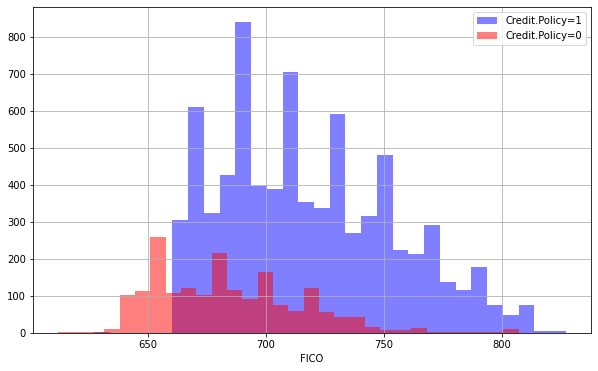

In [ ]:
plt.figure(figsize=(10,6))
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
 bins=30,label='Credit.Policy=1')
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
 bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

In [ ]:
categorical_var = ['purpose']
loan_data2 = pd.get_dummies(data= loan_data,columns=categorical_var,drop_first=True)
loan_data2.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [ ]:
loan_data2.head(20)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = loan_data2.drop('not.fully.paid',axis = 1)
y = loan_data2['not.fully.paid']
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.30, random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predLoan = loanTree.predict(X_testset)
from sklearn.metrics import confusion_matrix,classification_report,precision_score
print(classification_report(y_testset,predLoan))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2399
           1       0.50      0.01      0.02       475

    accuracy                           0.83      2874
   macro avg       0.67      0.50      0.46      2874
weighted avg       0.78      0.83      0.76      2874



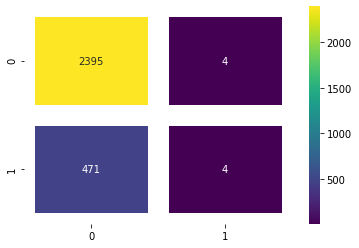

In [ ]:
sns.heatmap(confusion_matrix(y_testset,predLoan),cmap='viridis',lw = 20, fmt='g',annot=True)

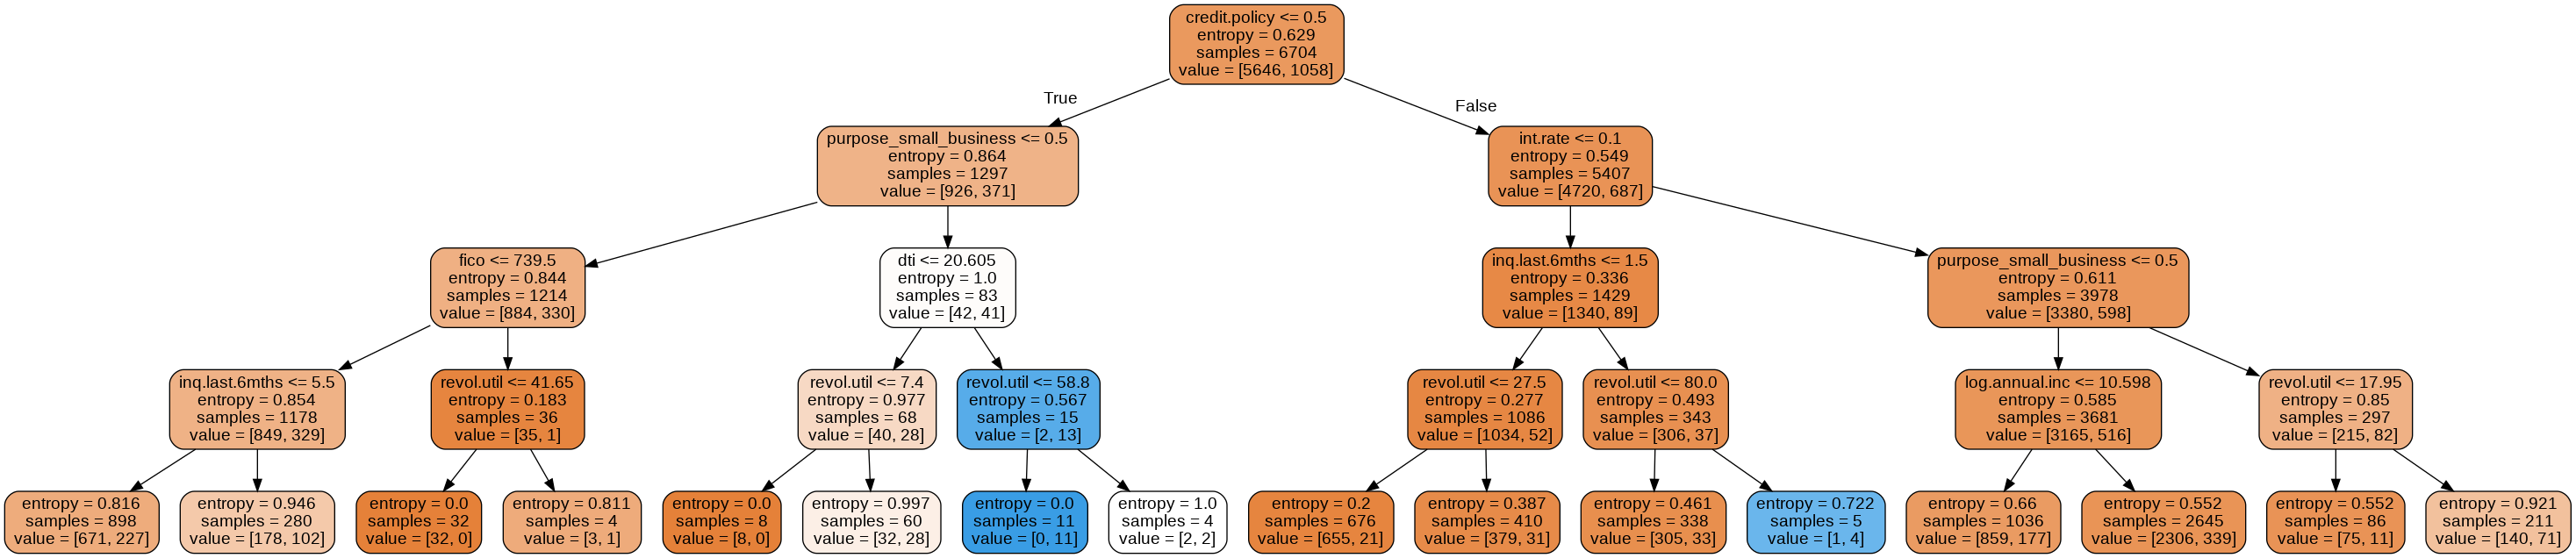

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot
features = list(X.columns)
# features
dot_data = StringIO()  
export_graphviz(loanTree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier



In [ ]:
data = pd.DataFrame()
data['A'] = ['a','a','b','a','c','d','d']
data['B'] = ['b','b','a','b','a','b','a']
data['C'] = [0, 0, 1, 0, 1, 0, 0]
data['Class'] = ['n','n','y','n','y','n','n']


In [ ]:
data.head(7)

,A,B,C,Class
0,a,b,0,n
1,a,b,0,n
2,b,a,1,y
3,a,b,0,n
4,c,a,1,y
5,d,b,0,n
6,d,a,0,n


In [ ]:
one_hot_data = pd.get_dummies(data[['A','B','C']])

In [ ]:
one_hot_data

,C,A_a,A_b,A_c,A_d,B_a,B_b
0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,1
2,1,0,1,0,0,1,0
3,0,1,0,0,0,0,1
4,1,0,0,1,0,1,0
5,0,0,0,0,1,0,1
6,0,0,0,0,1,1,0


In [ ]:
one_hot_data = pd.get_dummies(data[['A','B','C']],drop_first=True)

In [ ]:
one_hot_data

,C,A_b,A_c,A_d,B_b
0,0,0,0,0,1
1,0,0,0,0,1
2,1,1,0,0,0
3,0,0,0,0,1
4,1,0,1,0,0
5,0,0,0,1,1
6,0,0,0,1,0


In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(one_hot_data, data['Class'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')